In [477]:
#importing packages
import glob
import pandas as pd
import os
import sklearn as sk
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [574]:
#Defining funcations to read data and store dataframe as feather ,redundent function to merge CSV
def read_data(index_of_files,passed_df=pd.DataFrame()):
    total_row=0
    print(len(index_of_files))
    
    for i in index_of_files:
        file=pd.read_csv(i,dtype="float32",low_memory=True,header=None,engine="pyarrow")
        passed_df=pd.concat([passed_df,file],axis=0,ignore_index=True)
    # print(total_row)
    return passed_df

def convert_to_feather(dataframe,path):
    feather=dataframe.to_feather(path)
    print("Dataframe stored")

def merge_csv(*list_of_frames):
    a=0
    for i in list_of_frames:
        a=a+i.shape[0]
    store=pd.DataFrame()
    for i in list_of_frames:
       store=pd.concat([store,i],axis=0)
    return store


In [594]:
#Reading CSV files from their file paths
path1="F:\\ML_dataset\Test_data"
list_of_test_csv_files=glob.glob(path1 + '/*.csv')
train_df=pd.DataFrame()

path="F:\\ML_dataset\Fresh_download\Open_Box_CSV"
list_of_training_csv_files = glob.glob(path + '/*.csv')
# open_box=read_data(list_of_training_csv_files)
train_df=read_data(list_of_training_csv_files,train_df)

path="F:\\ML_dataset\Fresh_download\special_CSV"
list_of_training_csv_files = glob.glob(path + '/*.csv')
# special_data=read_data(list_of_training_csv_files)
train_df=read_data(list_of_training_csv_files,train_df)


path="F:\\ML_dataset\Fresh_download\corridor_CSV"
list_of_training_csv_files = glob.glob(path + '/*.csv')
# corr_data=read_data(list_of_training_csv_files)
train_df=read_data(list_of_training_csv_files,train_df)

#Additional folder for reading CSV
# path="F:\\ML_dataset\Fresh_download\corridor_2_CSV"
# list_of_training_csv_files = glob.glob(path + '/*.csv')
# corr_data_1=read_data(list_of_training_csv_files)

#readind data from labelled CSV with headings
# listed_data=pd.read_csv("F:\\ML_dataset\labelled_data.csv")
# col_headers=list(listed_data)
# total_rows=len(listed_data.index)
# data=listed_data.iloc[1:total_rows]

#Reading Test Data
test_df=pd.DataFrame()
test_df=read_data(list_of_test_csv_files,test_df)
train_df.isnull(),test_df.isnull()

10
6
13
16


In [596]:



#Reading heading of columns from labelled CSV file
headings=f=pd.read_csv("F:\\ML_dataset\labelled_data.csv",nrows=1).columns.tolist()

#defining column headers
train_df.columns=headings
test_df.columns=headings
#storing dataframe as feather
path="F:\\ML_dataset\Training_data_raw"
train_df.to_feather(path)
path1="F:\\ML_dataset\Testing_data_raw"
test_df.to_feather(path1)



In [597]:
#reading from feather
path="F:\\ML_dataset\Training_data_raw"
path1="F:\\ML_dataset\Test_data_raw"
training_data=pd.read_feather(path)
testing_data=pd.read_feather(path1)




In [598]:
#Processing data
def process_data(data):
    #ignoring warning issued by pandas for functions no longer supported in the future
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
        #Splitting x and y data
        d1=data.iloc[:,0:1080]
        # print("D1",d1)
        d2=data.iloc[:,1080:1092]
        # print("\n D2",d2)
        d3=data.iloc[:,1092:1094]
        print("d1 before processing",d1.shape)
        print("d2 before processing",d2.shape)
        #Finding average of 1080 cols
        d1=d1.groupby((np.arange(len(d1.columns)) // 120), axis=1).mean()
        #adding qr and qk
        d2.insert(loc=4,column='Final_goal_q', value= (d2['Final_goal_qr'] + d2['Final_goal_qk']))
        d2.insert(loc=9,column='Local_goal_q', value= (d2['Local_goal_qr'] + d2['Local_goal_qk']))
        d2.insert(loc=12,column='Robot_pos_q', value= (d2['Robot_pos_qr'] + d2['Robot_pos_qk']))
        #removing qr and qk
        d2=d2.drop(['Final_goal_qr','Final_goal_qk'], axis=1,inplace=False)
        d2=d2.drop(['Local_goal_qr','Local_goal_qk'], axis=1,inplace=False)
        d2=d2.drop(['Robot_pos_qr','Robot_pos_qk'], axis=1,inplace=False)
        print("d1 after processing",d1.shape)
        print("d2 after processing",d2.shape)

        #getting column headers
        heading_1=list(d1)
        heading_2=list(d2)
        heading_1=heading_1+heading_2
       
        #merging to form x data
        d1=pd.concat([d1,d2],axis=1,ignore_index=True)
      
        return d1,d3,heading_1

In [601]:
#Processing data
x_training_data,y_training_data,heading=process_data(training_data)
testing_data.columns=headings
x_testing_data,y_testing_data,test_heading=process_data(testing_data)

#printing shpae for confirmation 
print(x_training_data.shape)
print(y_training_data.shape)

print(x_testing_data.shape)
print(y_testing_data.shape)


d1 before processing (651627, 1080)
d2 before processing (651627, 12)
d1 after processing (651627, 9)
d2 after processing (651627, 9)
d1 before processing (47960, 1080)
d2 before processing (47960, 12)
d1 after processing (47960, 9)
d2 after processing (47960, 9)
(651627, 18)
(651627, 2)
(47960, 18)
(47960, 2)


In [602]:
#splitting valdiation and training data
from sklearn.model_selection import train_test_split
x_n_train,x_n_val,y_n_train,y_n_val= train_test_split(x_training_data,y_training_data,test_size=0.2,random_state=42)
print(x_n_train.shape,y_n_train.shape,x_n_val.shape,y_n_val.shape)

(521301, 18) (521301, 2) (130326, 18) (130326, 2)


In [493]:
# Importing and fitting data for linear regression
lin_reg=LinearRegression()
lin_reg.fit(x_n_train,y_n_train)


(651627, 18)


LinearRegression()

In [534]:
#predicting for val dataset and calculting RMS error
pred=lin_reg.predict(x_n_val)
error=mean_squared_error(y_n_val,pred[:,:],multioutput= 'raw_values')
print(error)

[0.11376724 0.05841072]


In [496]:
#calculating R2 Score
from sklearn.metrics import r2_score
error= r2_score(y_n_val,pred[:,:],multioutput='raw_values')
error


array([0.23072011, 0.03058719])

In [519]:
#plotting learning Curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
training_sizes, training_scores,validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = x_training_data,
    y = y_training_data,
    train_sizes = np.linspace(5, len(x_training_data) * 0.8, dtype = int) ,
    cv = 5,
    scoring = 'neg_mean_squared_error'
)


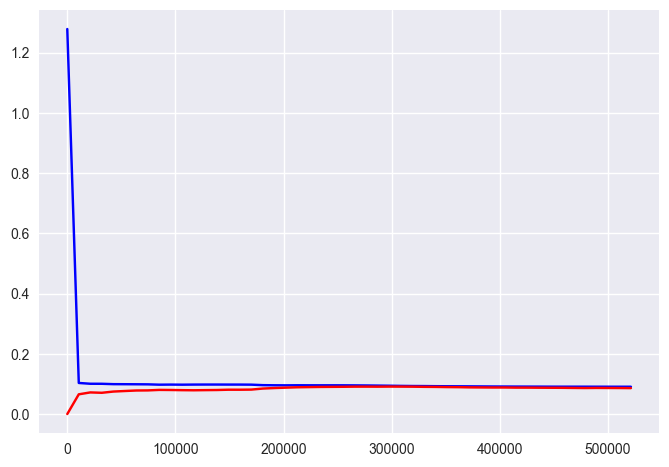

In [520]:
#plotting training and validation curves 
line1 = plt.plot(
    training_sizes, -validation_scores.mean(axis = 1), 'b')

line2 = plt.plot(
    training_sizes, -training_scores.mean(axis = 1), 'r')

In [541]:
#Import decision tree and fitting training dataset
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_n_train,y_n_train)
pred=model.predict(x_n_val)
error=mean_squared_error(y_n_val,pred[:,:],multioutput= 'raw_values')
print(error)

[0.00421088 0.00879876]


In [542]:
#plotting learning curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
training_sizes, training_scores,validation_scores = learning_curve(
    estimator = DecisionTreeRegressor(),
    X = x_training_data,
    y = y_training_data,
    train_sizes = np.linspace(5, len(x_training_data) * 0.8, dtype = int),
    cv = 5,
    scoring = 'neg_mean_squared_error'

)


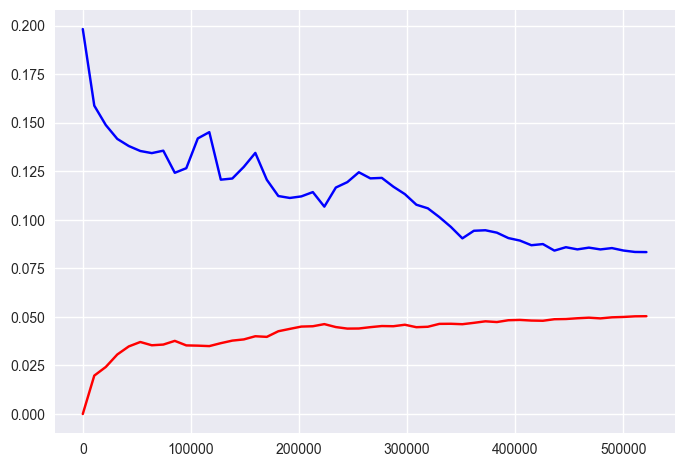

In [544]:
# plotting training and validation curves
line1 = plt.plot(
    training_sizes, -validation_scores.mean(axis = 1), 'b')

line2 = plt.plot(
    training_sizes, -training_scores.mean(axis = 1), 'r')

In [548]:
#decision tree algortihim with max_depth=10
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_n_train,y_n_train)
pred=model.predict(x_n_val)
error=mean_squared_error(y_n_val,pred[:,:],multioutput= 'raw_values')
print(error)
#Standardising val data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_n_train)

model.fit(standardized_data,y_n_train)

standardized_test_data = scaler.fit_transform(x_n_val)
pred=model.predict(standardized_test_data)
error=mean_squared_error(y_n_val,pred[:,:],multioutput= 'raw_values')
print(error)

[0.05267991 0.05234976]
[0.05628819 0.05337336]


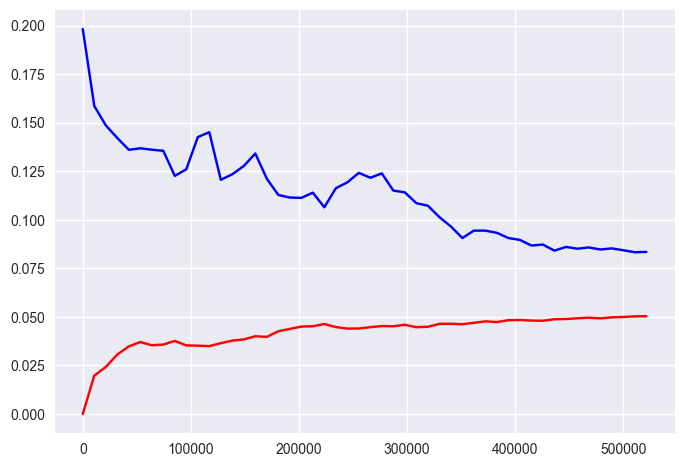

In [549]:
#plotting learning curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
#Standardising train data for standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_training_data)

training_sizes, training_scores,validation_scores = learning_curve(
    estimator = DecisionTreeRegressor(max_depth=10),
    X = standardized_data,
    y = y_training_data,
    train_sizes = np.linspace(5, len(x_training_data) * 0.8, dtype = int),
    cv = 5,
    scoring = 'neg_mean_squared_error'

)

# plotting training and validation curves
line1 = plt.plot(
    training_sizes, -validation_scores.mean(axis = 1), 'b')

line2 = plt.plot(
    training_sizes, -training_scores.mean(axis = 1), 'r')

In [545]:
#decision tree algortihim with max_depth=100
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=100)
model.fit(x_n_train,y_n_train)
pred=model.predict(x_n_val)
error=mean_squared_error(y_n_val,pred[:,:],multioutput= 'raw_values')
print(error)

[0.00415528 0.00891209]


In [573]:
#decision tree algortihim with max_depth=1
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=1)
model.fit(x_n_train,y_n_train)
pred=model.predict(x_n_val)
error=mean_squared_error(y_n_val,pred[:,:],multioutput= 'raw_values')
print(error)

[0.12025154 0.06024988]


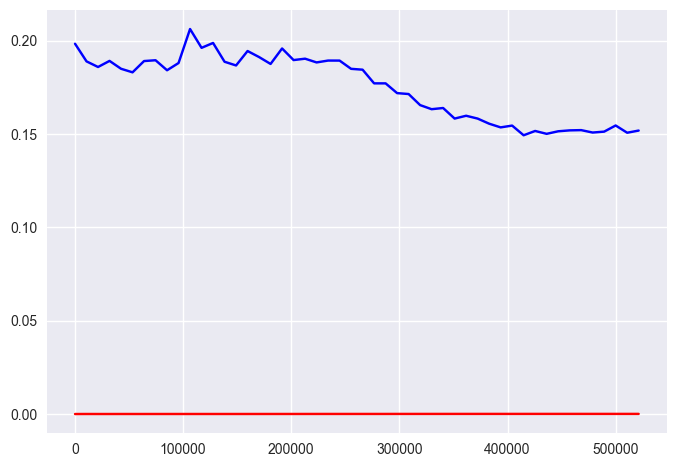

In [546]:
#plotting learning curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
training_sizes, training_scores,validation_scores = learning_curve(
    estimator = DecisionTreeRegressor(max_depth=100),
    X = x_training_data,
    y = y_training_data,
    train_sizes = np.linspace(5, len(x_training_data) * 0.8, dtype = int),
    cv = 5,
    scoring = 'neg_mean_squared_error'

)

# plotting training and validation curves
line1 = plt.plot(
    training_sizes, -validation_scores.mean(axis = 1), 'b')

line2 = plt.plot(
    training_sizes, -training_scores.mean(axis = 1), 'r')

Epoch 1/50
522/522 [==============================] - 2s 2ms/step - loss: 0.1396 - mean_squared_error: 0.1396 - val_loss: 0.1065 - val_mean_squared_error: 0.1065
Epoch 2/50
522/522 [==============================] - 1s 2ms/step - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 3/50
522/522 [==============================] - 1s 2ms/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0944 - val_mean_squared_error: 0.0944
Epoch 4/50
522/522 [==============================] - 1s 2ms/step - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 5/50
522/522 [==============================] - 1s 2ms/step - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 6/50
522/522 [==============================] - 1s 2ms/step - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.0900 - val_mean_squared_error: 0.0900
Epoch 7/50
522/522 [========

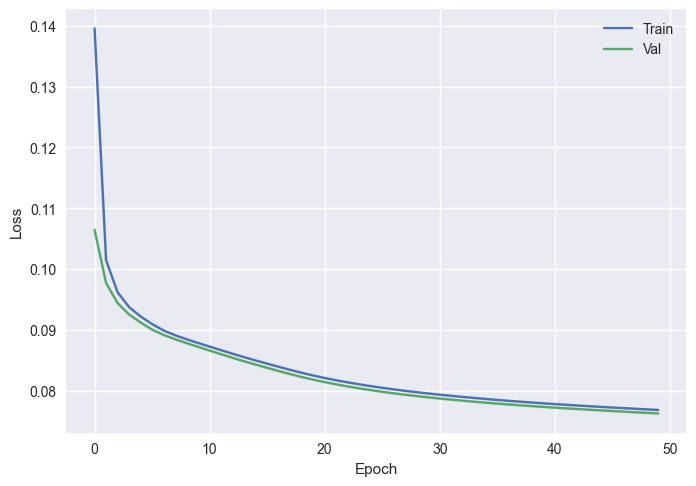

In [551]:
#setting up neural network from keras
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#setting up layers
neural = Sequential([
    Dense(18, activation='tanh'),
    Dense(18, activation='tanh'),
    Dense(2, activation='sigmoid')
])
#compiling the neural network
neural.compile(optimizer='sgd',
              loss='mean_squared_error',
             metrics=['mean_squared_error'])


hist = neural.fit(x_n_train, y_n_train, batch_size=1000, epochs=50,validation_data=(x_n_val, y_n_val))

#predicting values 
pred1=neural.predict(x_n_val)

#finding error
error_1=mean_squared_error(y_n_val.iloc[:,0:1],pred1[:,0], multioutput='raw_values')
print('Eval of v',error_1)
error_2=mean_squared_error(y_n_val.iloc[:,1:2],pred1[:,1], multioutput='raw_values')
print('Eval of w',error_2)

#learning curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.show()


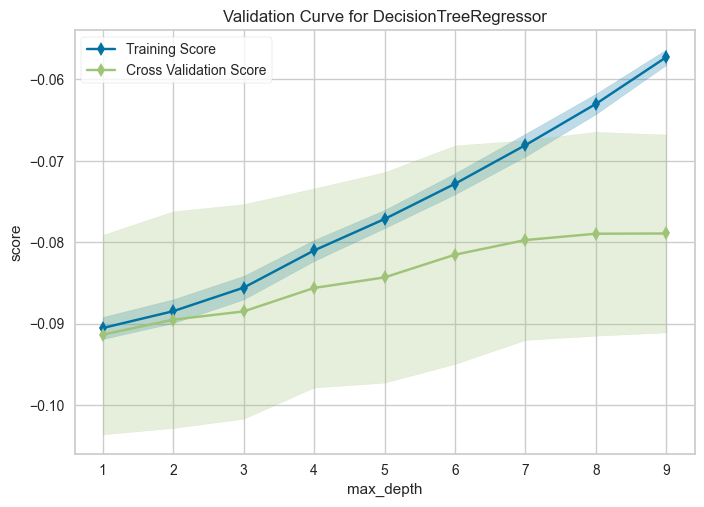

In [569]:
from yellowbrick.model_selection import validation_curve


#finding validation curves 
viz = validation_curve(
    DecisionTreeRegressor(), x_training_data, y_training_data, param_name="max_depth",
    param_range=np.arange(1, 10), cv=10, scoring="neg_mean_squared_error",
)



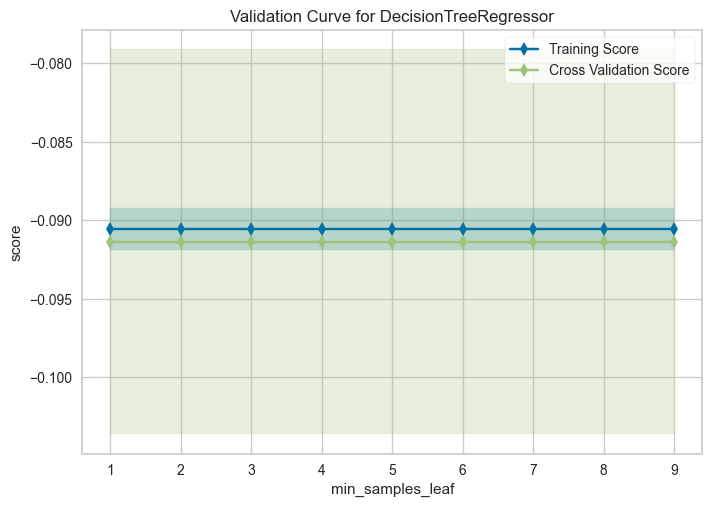

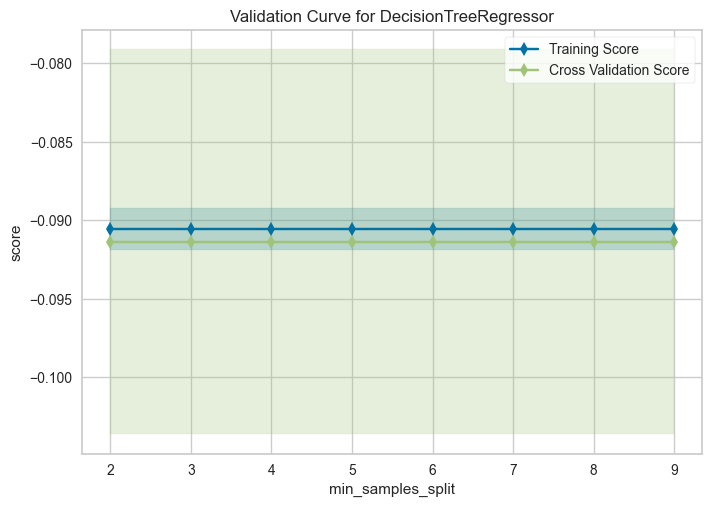

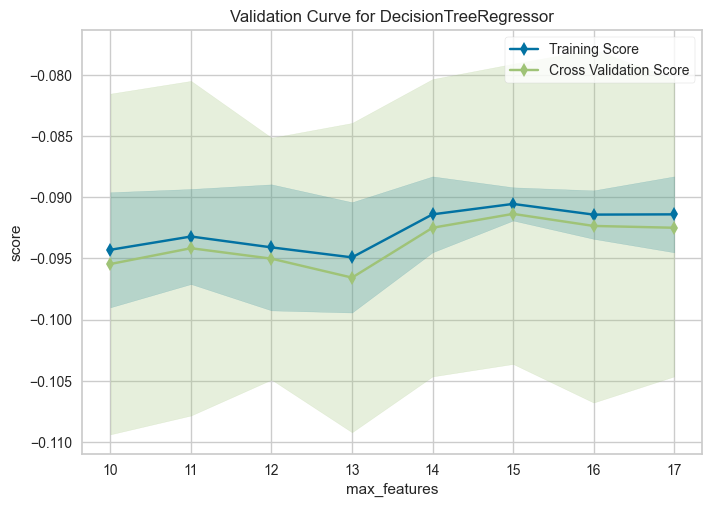

In [570]:

#finding validation curves 
viz = validation_curve(
    DecisionTreeRegressor(max_depth=1), x_training_data, y_training_data, param_name="min_samples_leaf",
    param_range=np.arange(1, 10), cv=10, scoring="neg_mean_squared_error",
)


#finding validation curves 
viz = validation_curve(
    DecisionTreeRegressor(max_depth=1), x_training_data, y_training_data, param_name="min_samples_split",
    param_range=np.arange(1, 10), cv=10, scoring="neg_mean_squared_error",
)



#finding validation curves 
viz = validation_curve(
    DecisionTreeRegressor(max_depth=1), x_training_data, y_training_data, param_name="max_features",
    param_range=np.arange(10, 18), cv=10, scoring="neg_mean_squared_error",
)

[0.09062949 0.06737162]


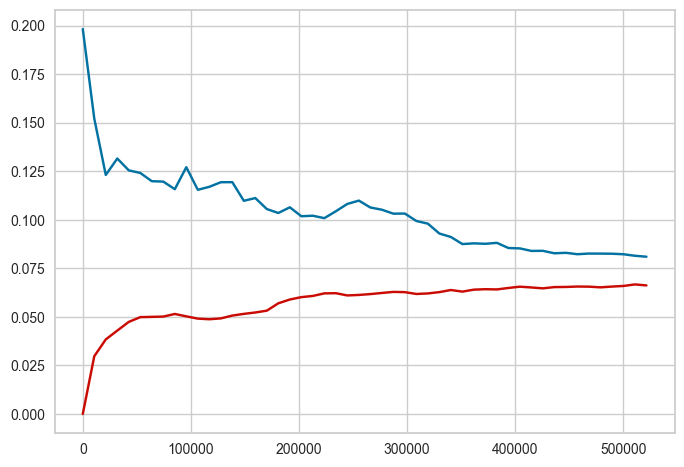

In [606]:
#decision tree algortihim with max_depth=7
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=7)
model.fit(x_training_data,y_training_data)
pred=model.predict(x_testing_data)
error=mean_squared_error(y_testing_data,pred[:,:],multioutput= 'raw_values')
print(error)

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
#plotting learning curve
training_sizes, training_scores,validation_scores = learning_curve(
    estimator = DecisionTreeRegressor(max_depth=7),
    X = x_training_data,
    y = y_training_data,
    train_sizes = np.linspace(5, len(x_training_data) * 0.8, dtype = int),
    cv = 5,
    scoring = 'neg_mean_squared_error'

)

# plotting training and validation curves
line1 = plt.plot(
    training_sizes, -validation_scores.mean(axis = 1), 'b')

line2 = plt.plot(
    training_sizes, -training_scores.mean(axis = 1), 'r')

In [619]:
from math import *
#finding eout for two componenets of Y, v and w  
d_vc=19
#assuming delta as 0.1
E_out_v=error[0]+sqrt(8/len(y_testing_data)*log(4*((2*len(y_testing_data)**(d_vc)+1))/0.1))
E_out_w=error[1]+sqrt(8/len(y_testing_data)*log(4*((2*len(y_testing_data)**(d_vc)+1))/0.1))
print("E_test for Y_test =",error)
print("E_out_v= ",E_out_v,"\nE_out_w= ",E_out_w)


E_test for Y_test = [0.09062949 0.06737162]
E_out_v=  0.2774184977453761 
E_out_w=  0.25416062729773226
